<a href="https://colab.research.google.com/github/tsiracuse2201/python-mini-projects/blob/master/Copy_of_Scraping_BC's_COVID_19_Test_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Scraping BC's reopening website to get updated COVID-19 test statistics**

**Use the Google Chrome browser. You might run into some issues if you are using Safari.** 

**Save a copy of this document to your Google Drive: Go to the upper left-hand corner of this page, click "File" and choose "Save a copy in Drive".** You will see a folder named "Colab Notebooks" in your Google Drive. 

We can write a Python program to extract the updated COVID-19 test results from BC's reopening website.

First, let us import all the necessary libraries:

In [ ]:
import urllib.request #The package we will use to download a web page from the internet
import lxml.html #The package we will use to parse and extract data in the web page 
import pandas as pd #The package we will use to store data we extracted from the web page

Let's now connect to BC's reopening site and download the page with updated COVID-19 test statistics.

In [ ]:
web_url = 'https://www.bc.edu/content/bc-web/sites/reopening-boston-college.html' #Web page to scrape
content = urllib.request.urlopen(web_url).read() #Scrape and store the web page as 'content'

We are now ready to parse the web page, extra the test statistics, and store the data for future use. We can also print out the data to check if the data were correctly extracted (very useful in debugging).

From inspecting the webpage, we find that BC's reopening website organizes the test results by week. In the screenshot below, each "section" corresponds to one week. We can first locate all these "sections", and extract the test results from each section for that week. We can also see a piece of text that indicates the week is enclosed in h2>...</h2 and the test figure is encloded in p>...</p.

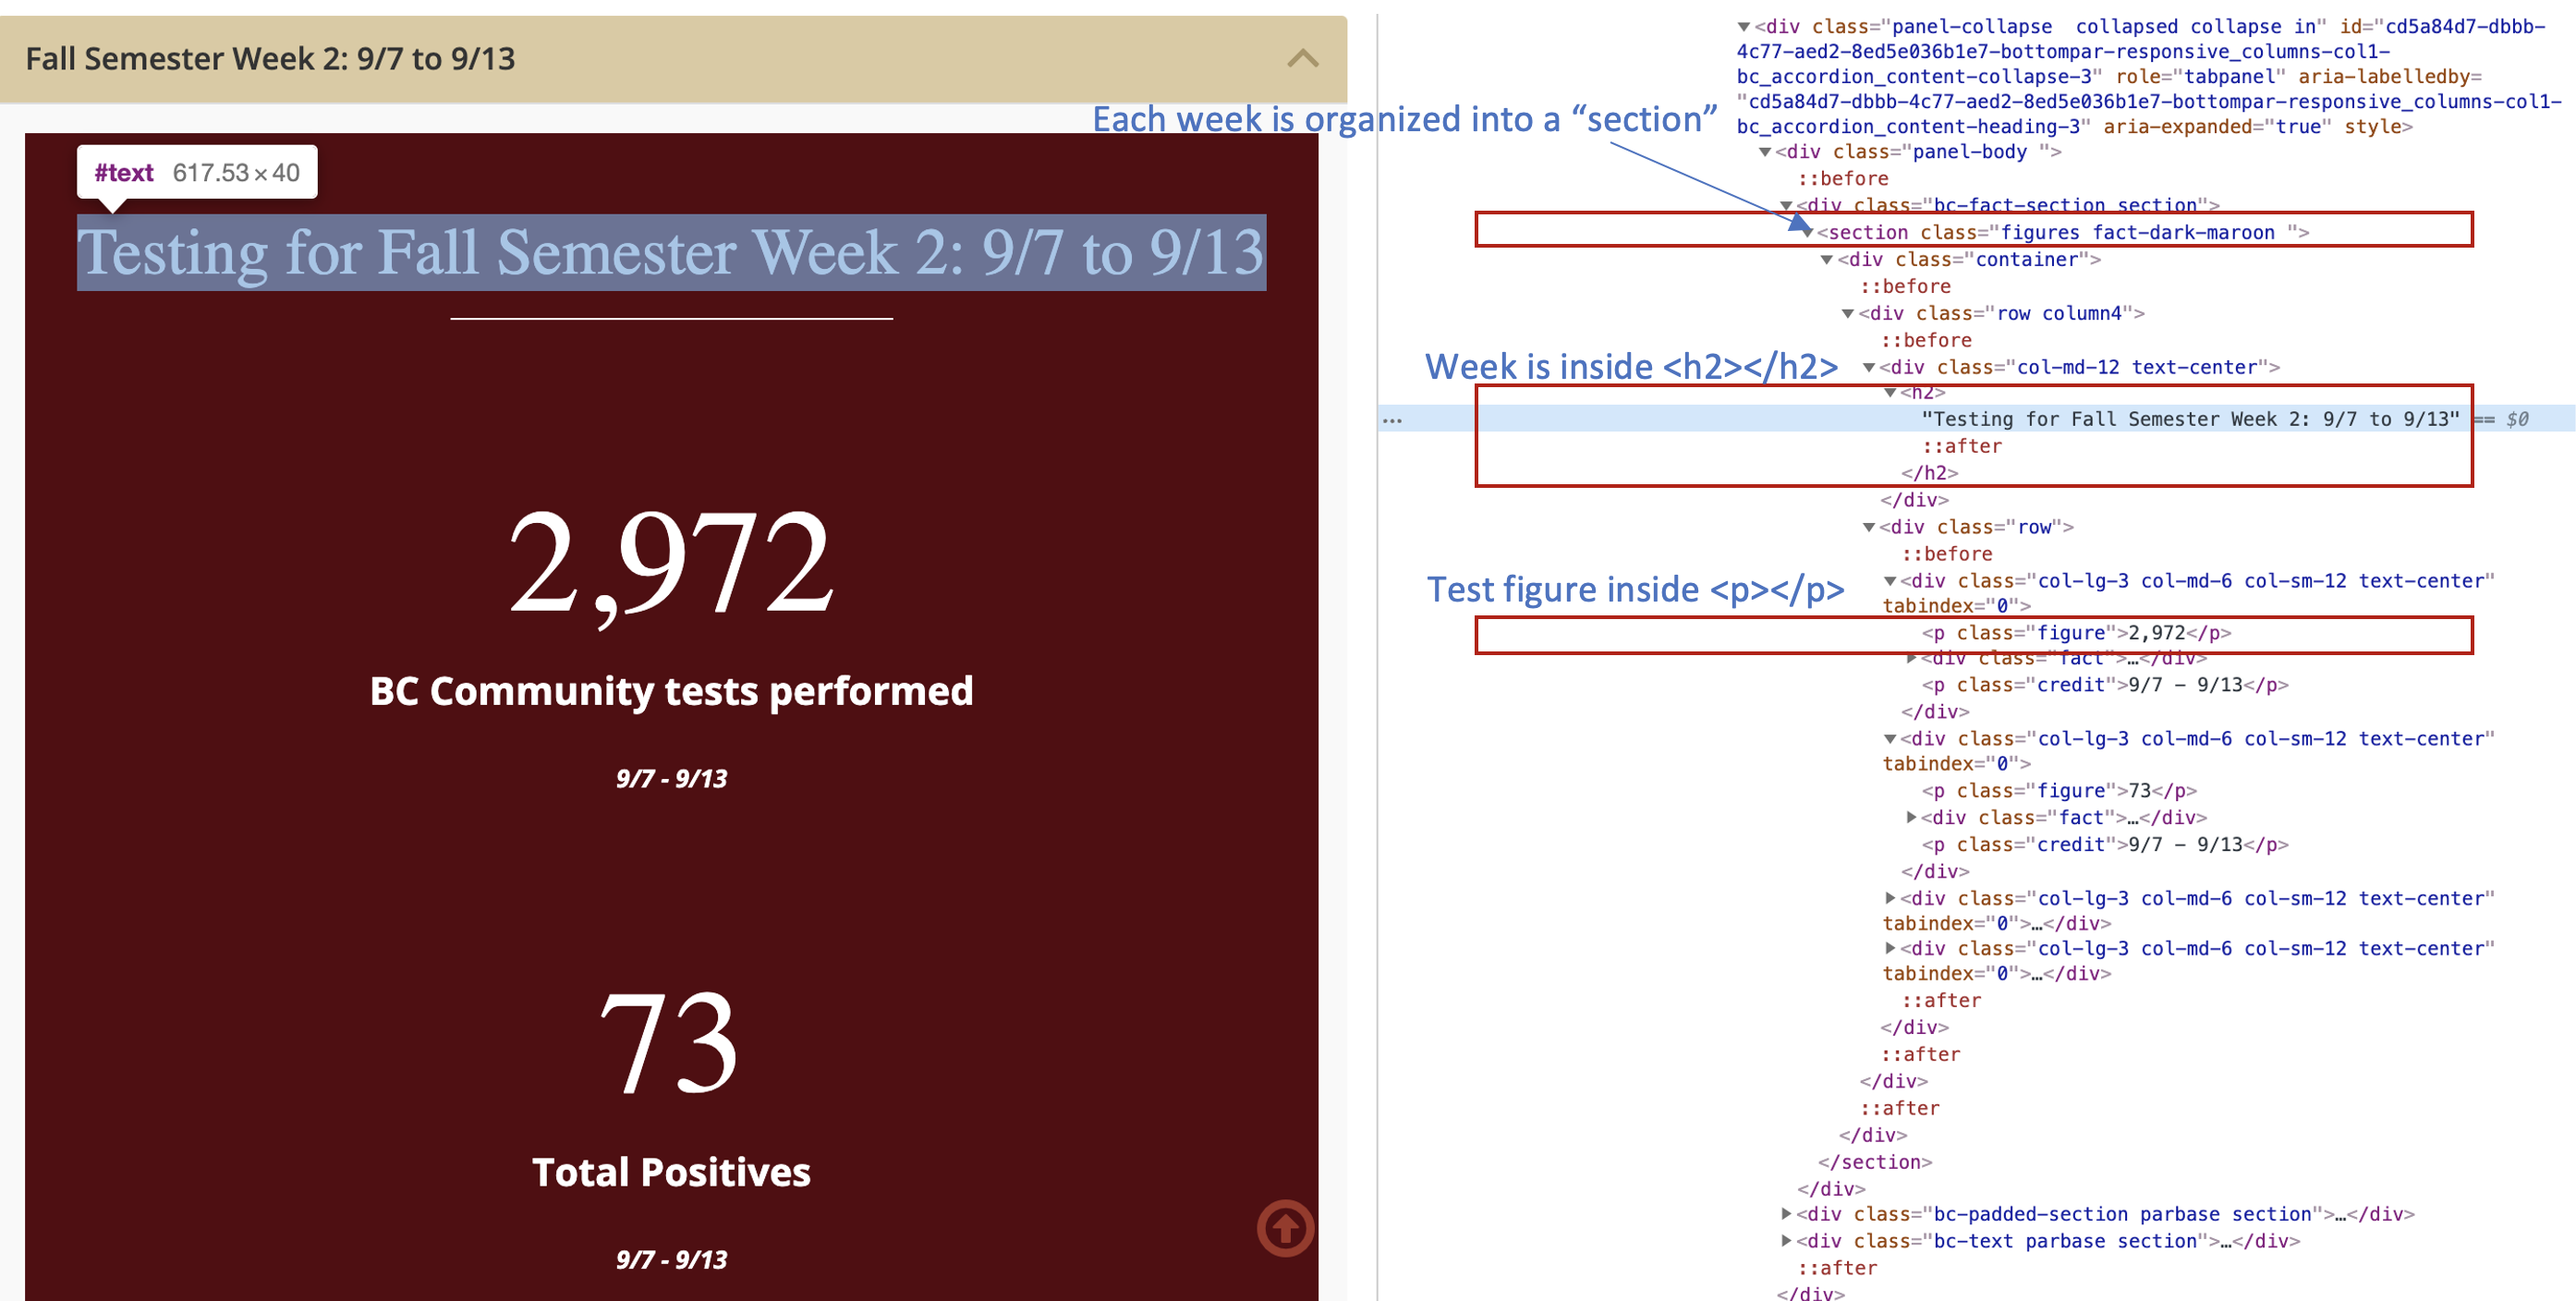

Run the codes below:

In [ ]:
weeks=[] #List to store the week number
total_tests=[] #List to store BC Community tests performed
total_positives=[] #List to store Total Positives
undergrad_tests=[] #List to store Undergraduate Tests
undergrad_positives=[] #List to store Undergrads Testing Positive

tree = lxml.html.fromstring(content) #Parse the web page
results = tree.xpath("//section[@class='figures fact-dark-maroon ']") #Find all weekly test results. See screenshot above. Each week is a "section"
for result in results: #Iterate through each week
  week = result.xpath(".//h2/text()")[0] #Get the week number, which is inside <h2></h2>
  figures=result.xpath(".//p[@class='figure']/text()") #Get test results for the week, which are inside <p></p)
  
  print(week) #Print out the week number
  print(figures) #Print out the test results for the week

  figures = [int(figure.replace(',','')) for figure in figures] #Remove commas in the figures (for example, 7,933 would be 7933) and convert the figures (were text) into integers.
  print(figures)

  weeks.append(week) #Add week number, test results to the lists
  total_tests.append(figures[0]) #BC Community tests performed
  total_positives.append(figures[1]) #Total Positives
  undergrad_tests.append(figures[2]) #Undergraduate Tests
  undergrad_positives.append(figures[3]) #Undergrads Testing Positive

Spring Semester Week 8: 3/22/2021 to 3/28/2021
['9,219', '51', '7,417', '42']
[9219, 51, 7417, 42]
Testing for Pre-Opening Week 8/16 to 8/23
['7,681', '3', '1,572', '1']
[7681, 3, 1572, 1]
Testing for Pre-Opening Week 2: 8/24 to 8/30
['10,127', '8', '9,019', '8']
[10127, 8, 9019, 8]
Testing for Fall Semester Week 1: 8/31 to 9/6
['4,322', '26', '2,615', '26']
[4322, 26, 2615, 26]
Testing for Fall Semester Week 2: 9/7 to 9/13
['2,972', '73', '2,067', '73']
[2972, 73, 2067, 73]
Testing for Fall Semester Week 3: 9/14 to 9/20
['4,639', '17', '3,248', '17']
[4639, 17, 3248, 17]
Testing for Fall Semester Week 4: 9/21 to 9/27
['8,359', '41', '6,811', '40']
[8359, 41, 6811, 40]
Testing for Fall Semester Week 5: 9/28 to 10/4
['7,040', '13', '5,281', '13']
[7040, 13, 5281, 13]
Testing for Fall Semester Week 6: 10/5 to 10/11
['7,190', '12', '5,354', '9']
[7190, 12, 5354, 9]
Testing for Fall Semester Week 7: 10/12 to 10/18
['9,760', '25', '8,171', '24']
[9760, 25, 8171, 24]
Testing for Fall Semeste

We can save the data to an Excel file named 'BC_COVID-19_test_results.xlsx'.

The column names are: Week, Total Tests, Total Positives, Undergrad Tests, Undergrad Positives

In [ ]:
df = pd.DataFrame({'Week':weeks, 'Total Tests':total_tests, 'Total Positives':total_positives, 'Undergrad Tests':undergrad_tests, 'Undergrad Positives':undergrad_positives}) 
df.to_excel('BC_COVID-19_test_results.xlsx', index=False) #if index=True, Python will add one extra column of row index 1,2,3...

We can download the Excel file to our local machine:

**Use the Google Chrome browser. You may not be able to download the Excel file if you are using Safari.**

In [ ]:
from google.colab import files
files.download("BC_COVID-19_test_results.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Open the Excel file and create line charts to visualize the time trend of BC's COVID-19 cases.

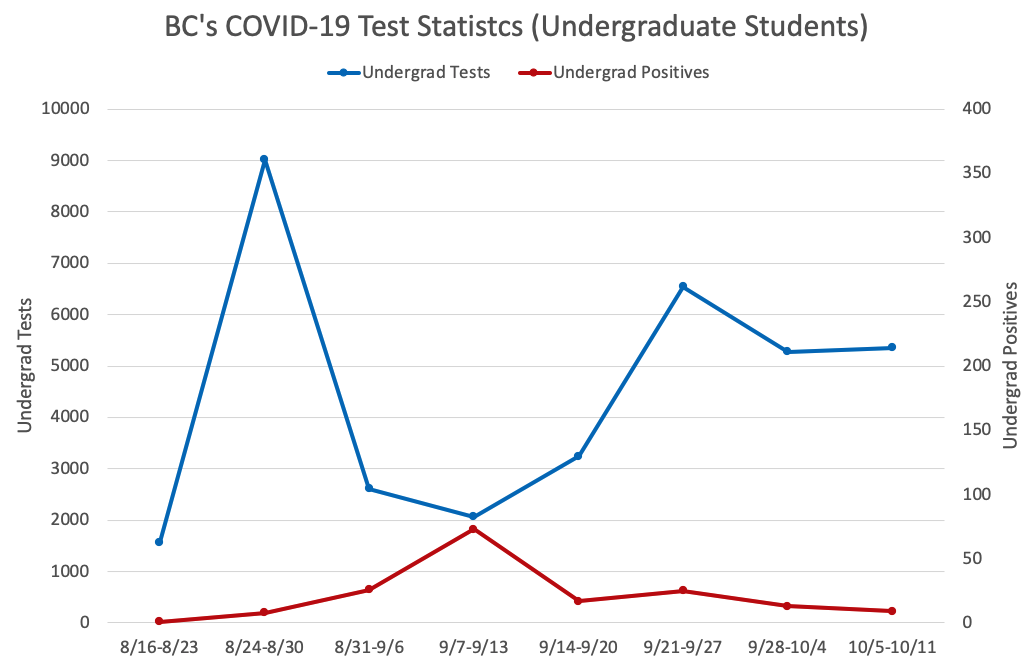